In [171]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
import xarray as xr

import random
from IPython.display import HTML

import IPython

import cartopy.feature as cfeature

from herbie import Herbie_latest, FastHerbie, Herbie
from toolbox import EasyMap, pc, ccrs
import metpy
from metpy.units import units
from paint.standard2 import cm_tmp

from pyart.graph import cm_colorblind 
import xmovie
# I like Py-ART's colorblind freindly colormaps

In [45]:
H = Herbie_latest(model="hrrr", fxx=range(0,10))
H

Could not find 7/63 GRIB files.


▌▌Herbie HRRR model sfc product initialized 2023-Jan-15 19:00 UTC F02 ┊ source=aws

In [146]:
H = Herbie(
    mt,  # model run date
    model="hrrr",  # model name
    product="sfc",  # model produce name (model dependent)
    fxx=0,  # forecast lead time
)
H.read_idx(searchString=":APCP")

✅ Found ┊ model=hrrr ┊ product=sfc ┊ 2023-Jan-15 12:00 UTC F00 ┊ GRIB2 @ aws ┊ IDX @ aws


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this
83,84,56387812,56388024,56387812-56388024,2023-01-15 12:00:00,2023-01-15 12:00:00,APCP,surface,0-0 day acc fcst,:APCP:surface:0-0 day acc fcst


In [147]:
qstr = '(' 
nfcst = 47
for i in range(nfcst):
    if i != nfcst -1:
        qstr = qstr +  f':APCP:surface:{i}-{i+1} h*|'
    else:
        qstr = qstr +  f':APCP:surface:{i}-{i+1} h*)'
    

In [148]:
qstr


'(:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP:surface:2-3 h*|:APCP:surface:3-4 h*|:APCP:surface:4-5 h*|:APCP:surface:5-6 h*|:APCP:surface:6-7 h*|:APCP:surface:7-8 h*|:APCP:surface:8-9 h*|:APCP:surface:9-10 h*|:APCP:surface:10-11 h*|:APCP:surface:11-12 h*|:APCP:surface:12-13 h*|:APCP:surface:13-14 h*|:APCP:surface:14-15 h*|:APCP:surface:15-16 h*|:APCP:surface:16-17 h*|:APCP:surface:17-18 h*|:APCP:surface:18-19 h*|:APCP:surface:19-20 h*|:APCP:surface:20-21 h*|:APCP:surface:21-22 h*|:APCP:surface:22-23 h*|:APCP:surface:23-24 h*|:APCP:surface:24-25 h*|:APCP:surface:25-26 h*|:APCP:surface:26-27 h*|:APCP:surface:27-28 h*|:APCP:surface:28-29 h*|:APCP:surface:29-30 h*|:APCP:surface:30-31 h*|:APCP:surface:31-32 h*|:APCP:surface:32-33 h*|:APCP:surface:33-34 h*|:APCP:surface:34-35 h*|:APCP:surface:35-36 h*|:APCP:surface:36-37 h*|:APCP:surface:37-38 h*|:APCP:surface:38-39 h*|:APCP:surface:39-40 h*|:APCP:surface:40-41 h*|:APCP:surface:41-42 h*|:APCP:surface:42-43 h*|:APCP:surface:43-44 h*|:APCP

In [149]:
H.read_idx(searchString=qstr)

No GRIB messages found. There might be something wrong with searchString='(:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP:surface:2-3 h*|:APCP:surface:3-4 h*|:APCP:surface:4-5 h*|:APCP:surface:5-6 h*|:APCP:surface:6-7 h*|:APCP:surface:7-8 h*|:APCP:surface:8-9 h*|:APCP:surface:9-10 h*|:APCP:surface:10-11 h*|:APCP:surface:11-12 h*|:APCP:surface:12-13 h*|:APCP:surface:13-14 h*|:APCP:surface:14-15 h*|:APCP:surface:15-16 h*|:APCP:surface:16-17 h*|:APCP:surface:17-18 h*|:APCP:surface:18-19 h*|:APCP:surface:19-20 h*|:APCP:surface:20-21 h*|:APCP:surface:21-22 h*|:APCP:surface:22-23 h*|:APCP:surface:23-24 h*|:APCP:surface:24-25 h*|:APCP:surface:25-26 h*|:APCP:surface:26-27 h*|:APCP:surface:27-28 h*|:APCP:surface:28-29 h*|:APCP:surface:29-30 h*|:APCP:surface:30-31 h*|:APCP:surface:31-32 h*|:APCP:surface:32-33 h*|:APCP:surface:33-34 h*|:APCP:surface:34-35 h*|:APCP:surface:35-36 h*|:APCP:surface:36-37 h*|:APCP:surface:37-38 h*|:APCP:surface:38-39 h*|:APCP:surface:39-40 h*|:APCP:surface:40-41 h*|:

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/herbie/archive.py:692: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  logic = df.search_this.str.contains(searchString)


,grib_message,start_byte,end_byte,range,reference_time,valid_time,variable,level,forecast_time,search_this


In [151]:
%%capture 
#Handles warnings..

mt = "2023-01-15 12:00"

FH = FastHerbie([mt], model="hrrr", fxx=range(1,nfcst))
FH.download(qstr) #This needs a good (and cheap) internet connection... ~1m on my connection
ds = FH.xarray(qstr, remove_grib=True)


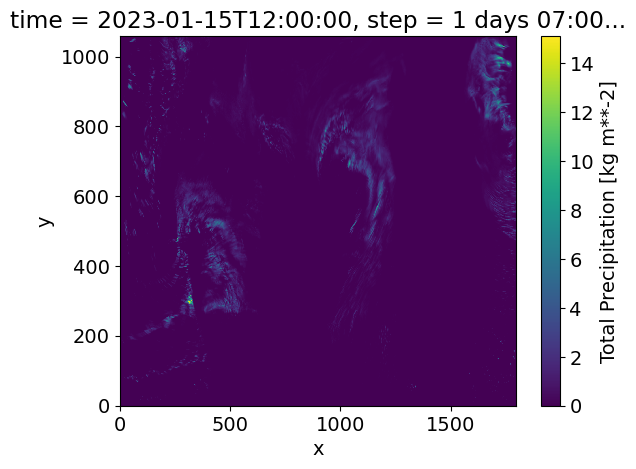

In [158]:
ds.tp.isel(step=30).plot()

In [155]:
dsi = ds.herbie.nearest_points([(-87.6298, 41.8781), (-87.9789, 41.7183), (-87.9646831, 41.8031498)], 
                               names=["Chicago", "Argonne", "Barn"])
dsi

/Users/scollis/miniconda3/envs/models/lib/python3.11/site-packages/metpy/xarray.py:382: UserWarning: More than one time coordinate present for variable "tp".
  warnings.warn('More than one ' + axis + ' coordinate present for variable'


<xarray.Dataset>
Dimensions:              (step: 46, point: 3)
Coordinates:
    time                 datetime64[ns] 2023-01-15T12:00:00
  * step                 (step) timedelta64[ns] 01:00:00 ... 1 days 22:00:00
    surface              float64 0.0
    latitude             (point) float64 41.88 41.71 41.79
    longitude            (point) float64 272.4 272.0 272.0
    valid_time           (step) datetime64[ns] 2023-01-15T13:00:00 ... 2023-0...
    metpy_crs            object Projection: lambert_conformal_conic
    y                    (point) float64 4.197e+05 3.987e+05 4.077e+05
    x                    (point) float64 8.185e+05 7.915e+05 7.915e+05
  * point                (point) <U7 'Chicago' 'Argonne' 'Barn'
Data variables:
    tp                   (point, step) float32 0.0 0.0 0.0 0.0 ... 0.0 0.013 0.0
    gribfile_projection  (point) object None None None
Attributes:
    GRIB_edition:            2
    GRIB_centre:             kwbc
    GRIB_centreDescription:  US National Weather Service - NCEP
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             US National Weather Service - NCEP
    model:                   hrrr
    product:                 sfc
    description:             High-Resolution Rapid Refresh - CONUS
    searchString:            (:APCP:surface:0-1 h*|:APCP:surface:1-2 h*|:APCP...

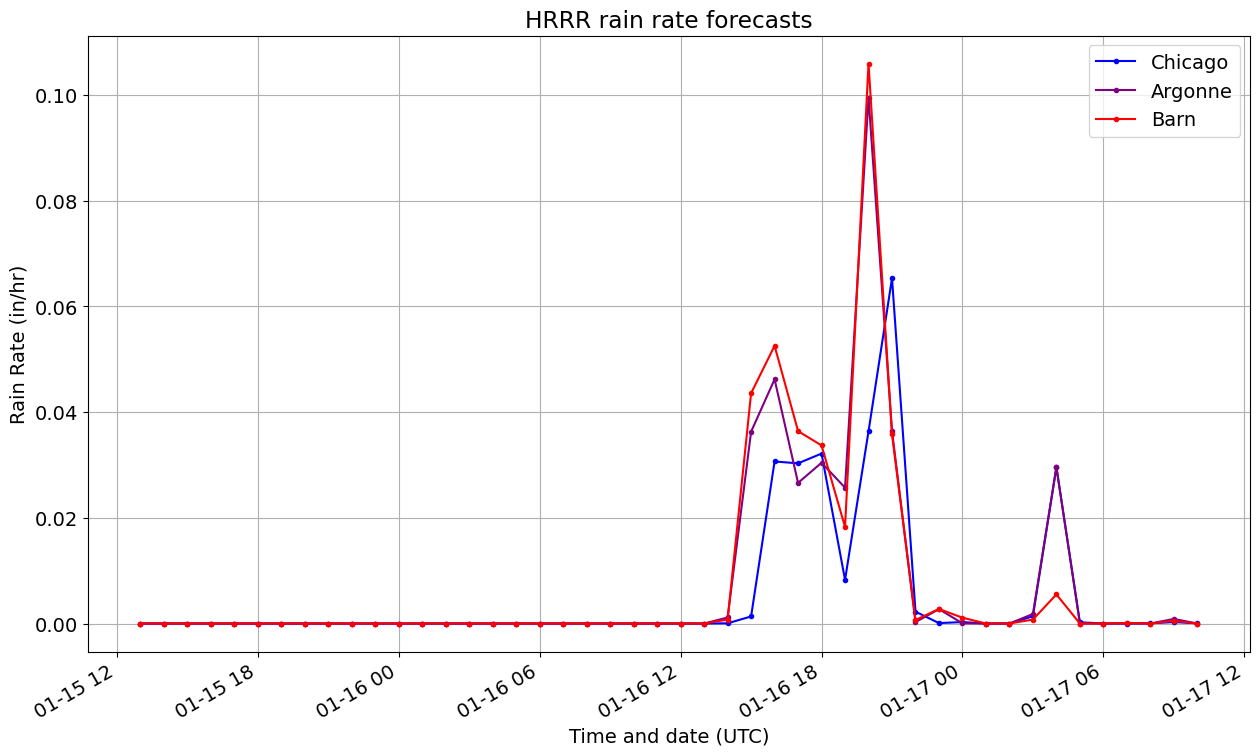

In [157]:
inches_per_mm = 0.0393701

plt.figure(figsize=[15,8])
(dsi.tp*inches_per_mm).isel(point=0).plot(color='blue', x="valid_time", marker=".", label=dsi.point[0].values)
(dsi.tp*inches_per_mm).isel(point=1).plot(color='purple', x="valid_time", marker=".", label=dsi.point[1].values)
(dsi.tp*inches_per_mm).isel(point=2).plot(color='red', x="valid_time", marker=".", label=dsi.point[2].values)

plt.grid()
plt.ylabel('Rain Rate (in/hr)')
plt.xlabel('Time and date (UTC)')
plt.title('HRRR rain rate forecasts')


plt.legend()

In [165]:
inches_per_mm = 0.0393701

def custom_plotfunc(movie_ds, fig, tt, *args, **kwargs):
    #nfig = plt.figure(figsize=[16,8])
    movie_dsi = kwargs['movie_dsi']
    ax = fig.subplots( ncols=1, 
                      subplot_kw={'autoscale_on': False,
                                  'projection' : movie_ds.herbie.crs})
    
    p = ax.pcolormesh(
            movie_ds.longitude,
            movie_ds.latitude,
            movie_ds.tp.isel(step=tt)*inches_per_mm,
            transform=pc,
            cmap=cm_colorblind.HomeyerRainbow,
            vmin=0, vmax=.1
        )
    coast = cfeature.NaturalEarthFeature(category='physical', scale='10m',
                                edgecolor='black', name='coastline')

    counties = cfeature.NaturalEarthFeature(category='cultural', scale='10m',
                                edgecolor='black', name='admin_2_counties_lakes', alpha=.2)

    ax.add_feature(cfeature.STATES, facecolor='none', edgecolor='black')
    ax.add_feature(coast, facecolor='none', edgecolor='black')
    ax.add_feature(counties, facecolor='none', edgecolor='black')
    
    plt.scatter(movie_dsi.longitude, movie_dsi.latitude, transform=pc, marker='o', color='r')

    for i in (movie_dsi.tp*inches_per_mm).isel(step=tt):
        plt.text(
            i.longitude.item(),
            i.latitude.item(),
            f"{i.point.item()}\n2m RR={i.item():.1f}",
            transform=pc, size=8
        )


    plt.colorbar(
        p,
        ax=ax,
        orientation="horizontal",
        pad=0.01,
        shrink=0.8
    )

    ax.set_title(
        f"{movie_ds.model.upper()}: {ds.description}\nValid: {movie_ds.valid_time[tt].dt.strftime('%H UTC %d %b %Y').item()}",
        loc="left",
    )
    
    ax.set_title(movie_ds.tp.GRIB_name, loc="right")
    ax.set_extent([-89, -86.5, 41, 42], crs=pc)
    gl = ax.gridlines(xlocs=np.linspace(-89,-86,5), ylocs=np.linspace(41.,42.,5),draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = True
    gl.bottom_labels = True    
    return None, None

In [166]:
font = {'family' : 'fantasy',
        'weight' : 'bold',
        'size'   : 10}

rc('font', **font)

mov_custom = xmovie.Movie(ds, custom_plotfunc, input_check=False, framedim='step',
                          figsize=[16,8],pixelwidth=1920, 
                          pixelheight=1080, **{'movie_dsi':dsi})

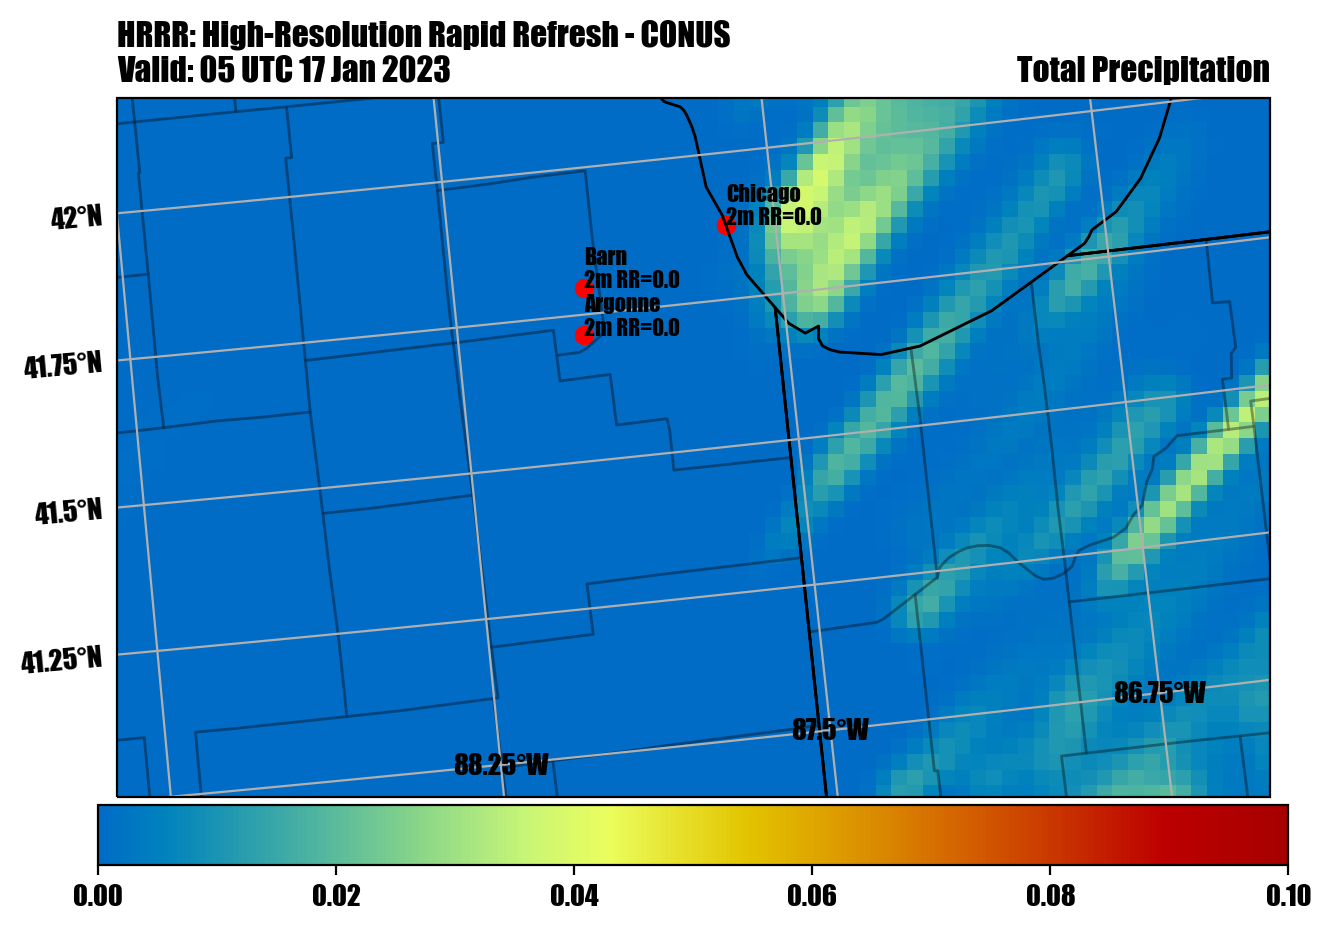

In [167]:
mov_custom.preview(40)

In [168]:
mov_custom.save(
    'hrrr_rain.mov',
    overwrite_existing=True,framerate=5)

Movie created at hrrr_rain.mov


In [169]:
#This is a very annoying kluge to get around the browser caching issue 
__counter__ = random.randint(0,2e9)
voname = './hrrr_rc%d.mov' %__counter__

!ffmpeg -y -i hrrr_rain.mov -vf crop=1750:1080:150:0 {voname}

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 14.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1671040319349/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=x86_64-apple-darwin13.4.0-clang --cxx=x86_64-apple-darwin13.4.0-clang++ --nm=x86_64-apple-darwin13.4.0-nm --ar=x86_64-apple-darwin13.4.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --disable-videotoolbox --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --enable-libx264 --enable-libx265 --enable-libaom --enable-libsvtav1 --enable-libxml2 --enable-pic --enable-shared --disable-static --enable-version3 --enable-zlib --pkg-config=/Users/runner/miniforge3/conda-bld/ffmpeg_16

In [172]:
IPython.display.Video(voname, width = 1100 , html_attributes="controls muted autoplay")

In [174]:
#This is a very annoying kluge to get around the browser caching issue 
__counter__ = random.randint(0,2e9)

oname = './hrrr_rain%d.gif' %__counter__
xmovie.core.convert_gif(voname, 
                        resolution=[1620, 800], 
                        remove_movie=False,
                       gpath=oname,
                       gif_palette=False)

HTML('<img src="./hrrr_rain%d.gif">' %__counter__)

GIF created at ./hrrr_rain1624329542.gif
